In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_excel(r"/content/drive/MyDrive/Concrete_Data.xls")

In [2]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [4]:
rc = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer","CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
cr = list(data.columns)

mapper = {}
for i, name in enumerate(cr):
    mapper[name] = rc[i]

data = data.rename(columns=mapper)

data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
data.isnull().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

#**Data Visualization**





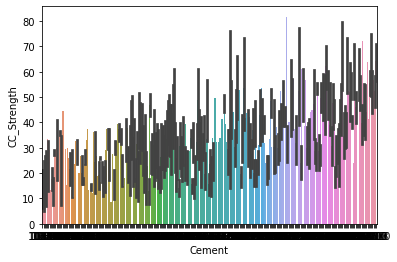

In [6]:
sns.barplot(x='Cement',y='CC_Strength',data=data)
plt.show()

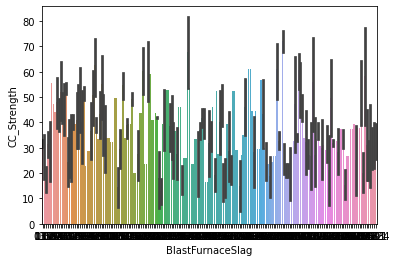

In [7]:
sns.barplot(x='BlastFurnaceSlag',y='CC_Strength',data=data)
plt.show()

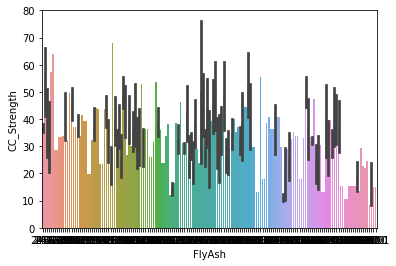

In [8]:
sns.barplot(x='FlyAsh',y='CC_Strength',data=data)
plt.show()

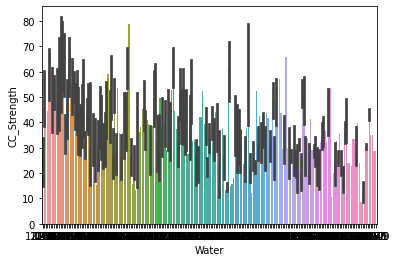

In [9]:
sns.barplot(x='Water',y='CC_Strength',data=data)
plt.show()

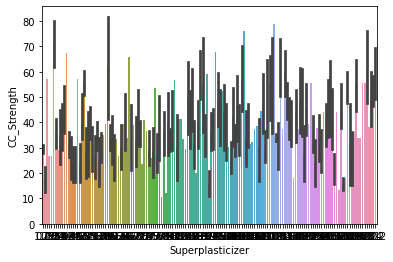

In [10]:
sns.barplot(x='Superplasticizer',y='CC_Strength',data=data)
plt.show()

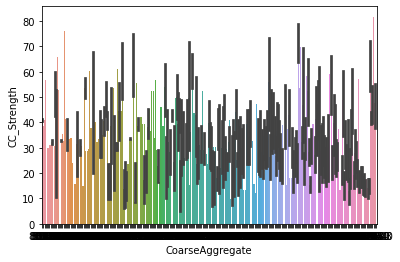

In [12]:
sns.barplot(x='CoarseAggregate',y='CC_Strength',data=data)
plt.show()

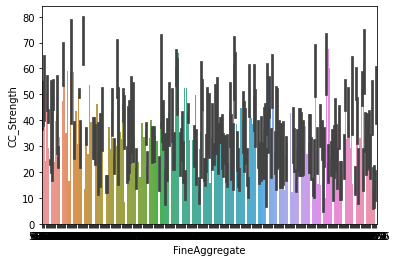

In [13]:
sns.barplot(x='FineAggregate',y='CC_Strength',data=data)
plt.show()

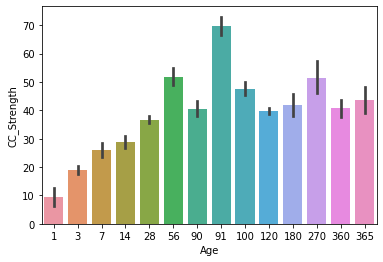

In [14]:
sns.barplot(x='Age',y='CC_Strength',data=data)
plt.show()  

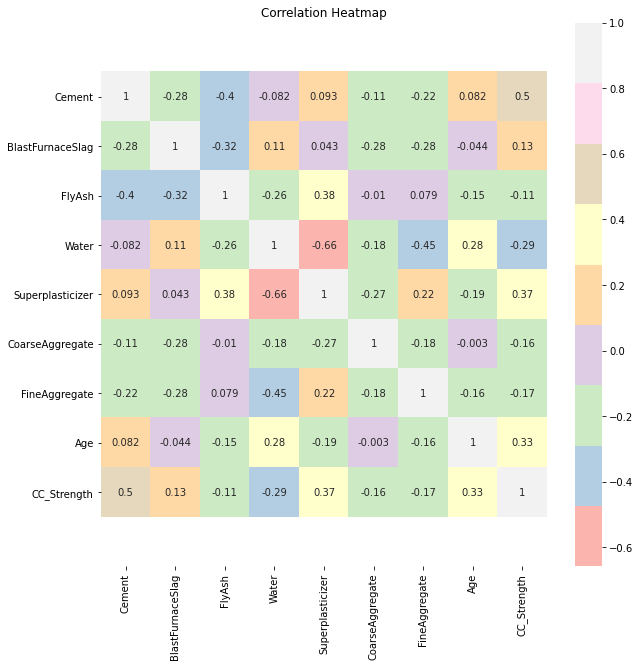

In [15]:
corr = data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='Pastel1')
b,t = plt.ylim()
plt.ylim(b+1, t-1)
plt.title("Correlation Heatmap")
plt.show()

#**Finding Out Liers**

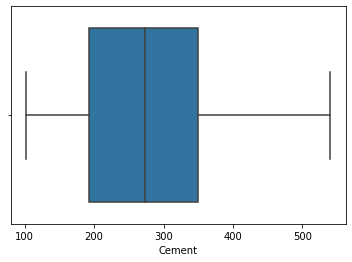

In [16]:
sns.boxplot(x='Cement',data=data)
plt.show()  

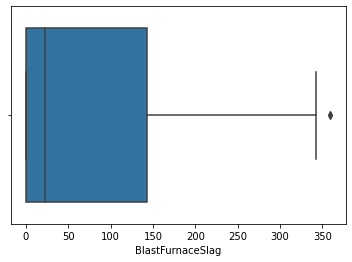

In [17]:
sns.boxplot(x='BlastFurnaceSlag',data=data)
plt.show()  

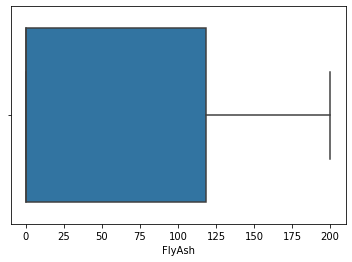

In [19]:
sns.boxplot(x='FlyAsh',data=data)
plt.show()  

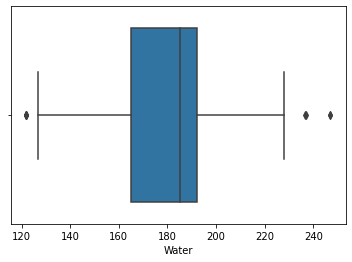

In [20]:
sns.boxplot(x='Water',data=data)
plt.show()  

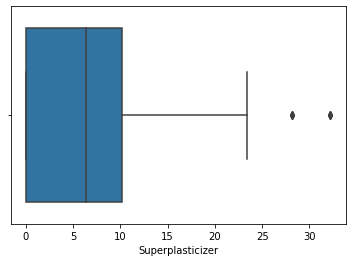

In [21]:
sns.boxplot(x='Superplasticizer',data=data)
plt.show()  

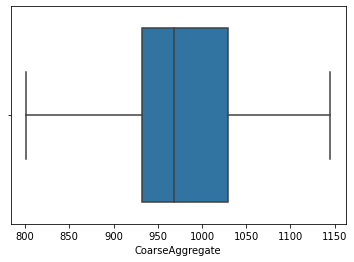

In [22]:
sns.boxplot(x='CoarseAggregate',data=data)
plt.show()  

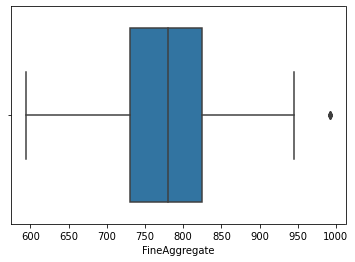

In [23]:
sns.boxplot(x='FineAggregate',data=data)
plt.show()  

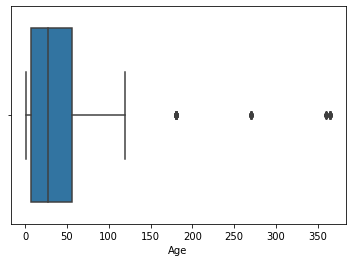

In [24]:
sns.boxplot(x='Age',data=data)
plt.show()  

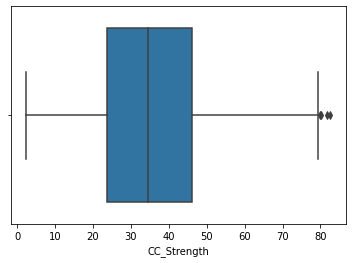

In [25]:
sns.boxplot(x='CC_Strength',data=data)
plt.show()  

#**Handling Out Liers**

In [26]:
from scipy import stats
z=np.abs(stats.zscore(data))
z


array([[2.47791782, 0.85688631, 0.84713204, ..., 1.21765845, 0.27973311,
        2.64519215],
       [2.47791782, 0.85688631, 0.84713204, ..., 1.21765845, 0.27973311,
        1.5612771 ],
       [0.49144303, 0.79553263, 0.84713204, ..., 2.24091255, 3.55306569,
        0.26660766],
       ...,
       [1.2700575 , 0.75958527, 0.85066095, ..., 0.08012724, 0.27973311,
        0.7259282 ],
       [1.16857975, 1.3080724 , 0.84713204, ..., 0.19118775, 0.27973311,
        0.18264932],
       [0.19401043, 0.30850389, 0.37696733, ..., 0.15072887, 0.27973311,
        0.20461667]])

In [27]:
threshold=3
print(np.where(z>3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936]), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3]))


In [28]:
cleaned_data = data[(z<3).all(axis=1)]

In [29]:
cleaned_data.shape

(981, 9)

In [30]:
data.shape

(1030, 9)

In [36]:
q1 = data.quantile(0.25) #25%
q3 = data.quantile(0.75) #75%
IQR = q3-q1 #50%

In [41]:
a

Cement               97.800000
BlastFurnaceSlag    -85.770000
FlyAsh              -70.962000
Water               148.640000
Superplasticizer     -6.096000
CoarseAggregate     873.560000
FineAggregate       675.120000
Age                 -22.400000
CC_Strength          10.249612
dtype: float64

In [42]:
a = q1-0.6*IQR
b = q3+0.6*IQR

In [43]:
b

Cement               444.575000
BlastFurnaceSlag     228.720000
FlyAsh               189.232000
Water                208.260000
Superplasticizer      16.256000
CoarseAggregate     1087.840000
FineAggregate        879.830000
Age                   85.400000
CC_Strength           59.593789
dtype: float64

In [44]:
(data<(q1-0.6*IQR))|(data>(q3+0.6*IQR))

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,True,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,True
2,False,False,False,True,False,False,True,True,False
3,False,False,False,True,False,False,True,True,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,True,False,False,False
1026,False,False,False,False,False,True,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [45]:
iqr_clean=data[~((data<(q1-0.6*IQR))|(data>(q3+0.6*IQR))).any(axis=1)]

In [46]:
iqr_clean.shape
data.shape

(1030, 9)

In [47]:
iqr_clean

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.021684
21,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,28,28.237490
46,349.0,0.0,0.0,192.0,0.0,1047.0,806.9,3,15.049193
54,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,7,14.589312
55,198.6,132.4,0.0,192.0,0.0,978.4,825.5,7,14.638265
...,...,...,...,...,...,...,...,...,...
1015,322.5,148.6,0.0,185.8,8.5,951.0,709.5,28,52.426376
1017,313.8,0.0,112.6,169.9,10.1,925.3,782.9,28,38.461040
1020,288.4,121.0,0.0,177.4,7.0,907.9,829.5,28,42.140084
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601


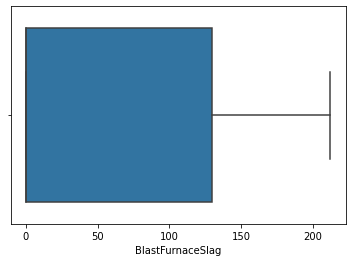

In [48]:
sns.boxplot(x='BlastFurnaceSlag',data=iqr_clean)
plt.show()

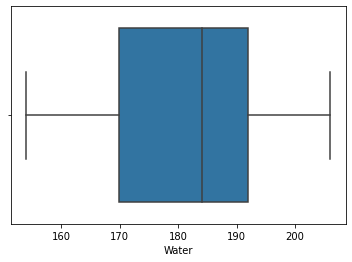

In [49]:
sns.boxplot(x='Water',data=iqr_clean)
plt.show()

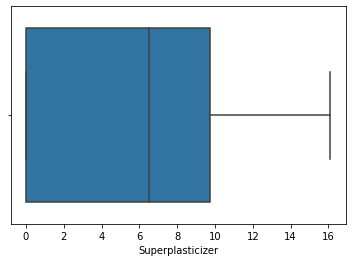

In [50]:
sns.boxplot(x='Superplasticizer',data=iqr_clean)
plt.show()

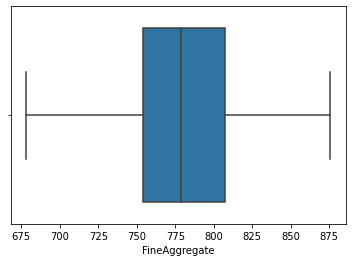

In [51]:
sns.boxplot(x='FineAggregate',data=iqr_clean)
plt.show()

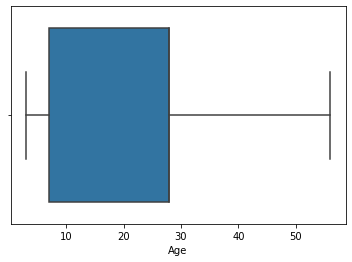

In [52]:
sns.boxplot(x='Age',data=iqr_clean)
plt.show()

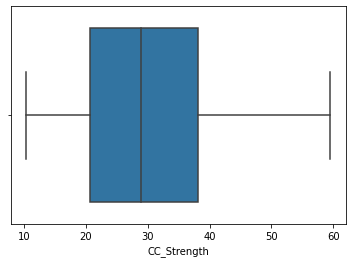

In [53]:
sns.boxplot(x='CC_Strength',data=iqr_clean)
plt.show()

#**Splitting Data Set**

In [54]:
X = pd.DataFrame(data.iloc[:,:-1])
Y = pd.DataFrame(data.iloc[:,-1])
X

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(824, 8)
(206, 8)
(824, 1)
(206, 1)


#**Feature Scaling**

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Model Building**

#**Linear Regression**

In [58]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
Y_test

,CC_Strength
747,26.062193
718,10.354551
175,79.296635
828,74.987410
713,9.694722
...,...
624,27.530777
987,33.762261
424,33.005216
889,33.715376


In [60]:
Y_pred_lr=lr.predict(X_test)
Y_pred_lr

array([[39.15859076],
       [14.62160337],
       [61.43707846],
       [53.79855463],
       [24.6752326 ],
       [53.43774751],
       [46.04755596],
       [27.01652289],
       [52.98916469],
       [37.76497851],
       [16.78431458],
       [39.37898598],
       [29.59061242],
       [35.96968519],
       [47.56760893],
       [56.54529209],
       [35.46689533],
       [29.57541423],
       [48.32193101],
       [35.08931157],
       [53.50415902],
       [32.64123647],
       [32.79089518],
       [47.86109857],
       [23.52718752],
       [23.50178227],
       [69.31287402],
       [26.44657241],
       [56.53587522],
       [48.27990146],
       [18.94826435],
       [36.73983049],
       [17.69991652],
       [19.85723155],
       [24.53282483],
       [15.47733735],
       [52.97691507],
       [27.88511249],
       [27.49675788],
       [26.10166771],
       [52.3753725 ],
       [30.71124674],
       [25.8183362 ],
       [35.35433495],
       [53.51293242],
       [53

In [61]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred_lr)

0.6368981103411098

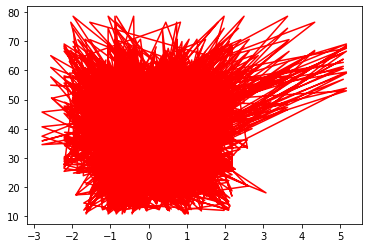

In [62]:
#plt.scatter(X_train,Y_train)
plt.plot(X_train,lr.predict(X_train),color='red')

#**Decision Tree Regressor**

In [63]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [64]:
Y_pred_dtr=dtr.predict(X_test)
Y_pred_dtr

array([12.63809508,  7.50701469, 79.29663476, 56.3991368 ,  9.13142014,
       47.64623898, 58.52272288, 23.5111316 , 79.98611076, 56.14196225,
       17.57612219, 40.38950408, 29.44751996, 12.37264682, 68.29949256,
       56.14403068, 42.29245784, 35.76312012, 59.76377968, 34.73580088,
       56.33708396, 26.94472208, 21.50475644, 59.76377968, 14.54104884,
       25.17966352, 60.2946762 , 31.35047372, 56.14403068, 66.82401392,
       17.57612219, 48.8466167 , 24.28196577, 27.82725136, 21.17932377,
        9.13142014, 35.3011712 , 25.3727168 , 32.6266938 , 37.2661778 ,
       39.300132  , 31.35047372, 32.24541357, 38.20386516, 47.72208134,
       33.39821744, 24.0654703 , 42.42345828, 32.82319446, 51.73276323,
       42.14008364, 27.82725136, 16.50398701, 40.7135578 , 48.9872698 ,
       43.94237391, 55.50971276, 47.72208134, 64.30053176, 36.96970312,
       38.21075992, 24.65566176, 67.76564114, 54.09628696, 17.16588397,
       67.69964844, 39.41734292, 24.3385028 , 13.19657064, 14.84

In [65]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred_dtr)

0.7896653278748581

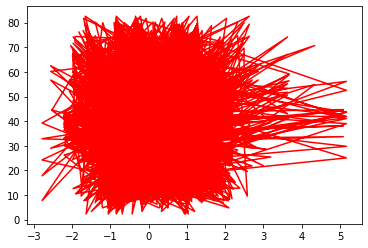

In [66]:
#plt.scatter(X_train,Y_train)
plt.plot(X_train,dtr.predict(X_train),color='red')

#**Random Forest Regressor**

In [67]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
Y_pred_rfr=rfr.predict(X_test)
Y_pred_rfr

array([22.18880922,  7.60798155, 79.26967625, 60.54856293, 10.76662279,
       47.45268796, 59.09916126, 24.24216921, 72.74751105, 51.51870851,
       18.3499349 , 43.30695283, 36.05716095, 14.81723224, 54.30552224,
       56.16482922, 40.33802977, 35.65032874, 52.35389213, 37.95166173,
       59.7380974 , 28.62937395, 29.70321213, 39.02238743, 15.71219967,
       24.64542994, 62.90072311, 25.16470189, 57.75468602, 63.32613473,
       20.2954638 , 45.8973969 , 27.51929395, 36.36594967, 19.8892797 ,
        9.31800417, 33.91373865, 26.66644957, 34.45663894, 33.50529306,
       34.26307348, 37.45606639, 32.42306085, 38.20674027, 60.0622169 ,
       33.45047972, 28.31792681, 32.08484052, 34.09724564, 51.00386989,
       43.97655123, 26.86137822, 21.55459177, 38.81119699, 51.51406144,
       44.47002989, 43.69626545, 53.95164671, 64.11196007, 36.36231613,
       36.33300651, 23.00933097, 57.25484781, 46.56541443, 12.22265329,
       59.32466621, 38.5498718 , 26.43315157, 14.43419385, 14.95

In [69]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred_rfr)

0.9209187980681427

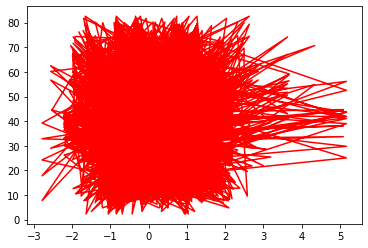

In [70]:
#plt.scatter(X_train,Y_train)
plt.plot(X_train,dtr.predict(X_train),color='red')
plt.show()

In [71]:
import pickle
pickle.dump(rfr,open('CC_Strength.pkl','wb'))